#

# REGRESI POLINOM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Intro to Python 7/Pertemuan 9-12/dataset_polinom.csv')
dataset

,x,y
0,2.528105,15.890253
1,-0.199686,2.992768
2,0.957476,5.387845
3,3.481786,53.105469
4,2.735116,35.751141
5,-2.954556,-20.425196
6,0.900177,2.677024
7,-1.302714,-0.075278
8,-1.206438,5.297869
9,-0.178803,5.434330


## SCATTER

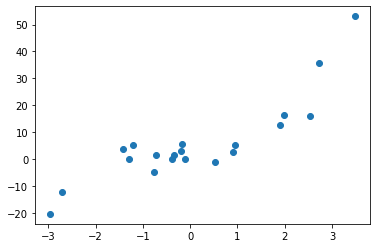

In [ ]:
#plot dataset
plt.figure()
plt.scatter(dataset['x'], dataset['y'])
plt.show()

## DERAJAT 1

In [ ]:
from sklearn import linear_model
from sklearn import metrics

In [ ]:
x_data = dataset[['x']] #dataframe array2d
y_data = dataset['y'] #series

In [ ]:
#initialize class model
regression_model = linear_model.LinearRegression() #regresi linear

#melakukan fitting model
regression_model.fit(X=x_data, y=y_data) #xnya harus kapital

#nilai intercept (b)
print('b = ', regression_model.intercept_)

#nilai dari slope (m)
print('m = ', regression_model.coef_)

#berdasarkan model, yg errornya paling kecil itu b dan m tsb

b =  5.095655378387164
m =  [7.82633055]


In [ ]:
b_model = regression_model.intercept_
m_model = regression_model.coef_[0]
dataset['prediksi_model'] = m_model * dataset['x'] + b_model
dataset['error_model'] = dataset['y'] - dataset['prediksi_model']
regression_model.predict([[2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([20.74831648])

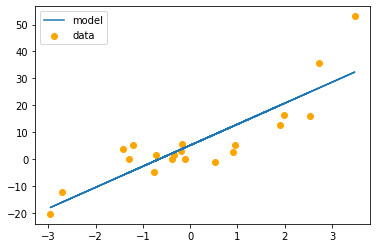

In [ ]:
#plot dataset
plt.figure()
plt.scatter(dataset['x'], dataset['y'], label='data', c ='orange')
plt.plot(dataset['x'], dataset['prediksi_model'], label = 'model')
plt.legend()
plt.show()

## DERAJAT 2

In [ ]:
dataset['x2'] = dataset['x'] **2

In [ ]:
# y = ax + bx^2 + c
# X = x, x^2
dataset = dataset.sort_values(by='x') #sort
X_data = dataset[['x', 'x2']] #array 2d
print(X_data.head())
y_data = dataset ['y']

model_polinom_2 = linear_model.LinearRegression() #regresi linier #initialize model
model_polinom_2.fit(X=X_data, y=y_data)
print('A =', model_polinom_2.intercept_) # nilai intercept (b)
print('B, c = ', model_polinom_2.coef_) #nilai dari slope (m)

           x        x2
5  -2.954556  8.729400
19 -2.708191  7.334301
17 -1.410317  1.988993
7  -1.302714  1.697065
8  -1.206438  1.455492
A = 1.9506489463618237
B, c =  [7.17280884 1.11171982]


In [ ]:
# y = A + Bx + Cx**2
# A = intercept
# B,c = koef dr tiap variable
# y = 1.95 + 7.17 * x + 1.1 * x^2
# untuk x=3, 1.95 +7.17*3 +1.1 * 3**3

In [ ]:
A = model_polinom_2.intercept_
B = model_polinom_2.coef_[0]
c = model_polinom_2.coef_[1]
dataset['prediksi'] = A + B*dataset['x'] + c * dataset['x2'] #menghitung hasil prediksi
dataset['prediksi_2'] = model_polinom_2.predict(X_data) #menghitung lgsg

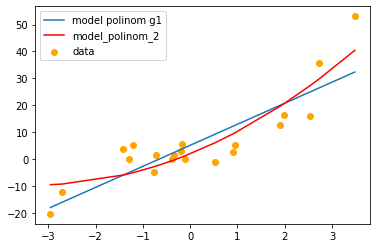

In [ ]:
plt.figure()
plt.scatter(dataset['x'], dataset['y'], label='data', c = 'orange')
plt.plot(dataset['x'], dataset['prediksi_model'], label = 'model polinom g1')
plt.plot(dataset['x'], dataset['prediksi_2'], label = 'model_polinom_2', c = 'red')
plt.legend()
plt.show()

In [ ]:
metrics.r2_score(dataset['prediksi_2'], dataset['y'])

0.7589888972795049

In [ ]:
sse = ((dataset['prediksi_2'] - dataset['y'])**2).sum()
sse

920.4714226432342

## DERAJAT 3

In [ ]:
# DERAJAT 3
# dibikin variable x^3
# fitting, predict, plot, hitung metricsnya (r2, sse)

In [ ]:
dataset['x3'] = dataset['x'] **3

In [ ]:
dataset = dataset.sort_values(by='x')
X_data = dataset[['x', 'x2', 'x3']]
print(X_data.head())
y_data = dataset ['y']

model_polinom_3 = linear_model.LinearRegression()
model_polinom_3.fit(X=X_data, y=y_data)
print('A =', model_polinom_3.intercept_)
print('B, C, D = ', model_polinom_3.coef_)

           x        x2         x3
5  -2.954556  8.729400 -25.791498
19 -2.708191  7.334301 -19.862692
17 -1.410317  1.988993  -2.805109
7  -1.302714  1.697065  -2.210791
8  -1.206438  1.455492  -1.755960
A = 1.8374561130393001
B, C, D =  [0.17527826 0.74523087 1.02234105]


In [ ]:
A = model_polinom_3.intercept_
B = model_polinom_3.coef_[0]
C = model_polinom_3.coef_[1]
D = model_polinom_3.coef_[2]
dataset['prediksi'] = A + B*dataset['x'] + C * dataset['x2'] + D * dataset['x3'] #menghitung hasil prediksi
dataset['prediksi_3'] = model_polinom_3.predict(X_data) #menghitung lgsg

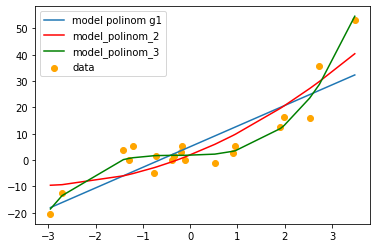

In [ ]:
plt.figure()
plt.scatter(dataset['x'], dataset['y'], label='data', c = 'orange')
plt.plot(dataset['x'], dataset['prediksi_model'], label = 'model polinom g1')
plt.plot(dataset['x'], dataset['prediksi_2'], label = 'model_polinom_2', c = 'red')
plt.plot(dataset['x'], dataset['prediksi_3'], label = 'model_polinom_3', c = 'green')
plt.legend()
plt.show()

In [ ]:
metrics.r2_score(dataset['prediksi_3'], dataset['y'])

0.9471225151347236

In [ ]:
sse = ((dataset['prediksi_3'] - dataset['y'])**2).sum()
sse

238.03558024077822

## DERAJAT 5

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data_x = dataset[['x']]
data_y = dataset['y']
#initiation  class, parameter degree = x denan pangkat paling tinggi
polinomial = PolynomialFeatures(degree=5)

#mengubah x-> x^0, x^1, x^2, dst
x_polinom = polinomial.fit_transform(data_x)
#akan mentransformasikan data dari satu variable x menjadi polinom
# dari x**0 sampai x**degree

#-> membuat array menjadi dataFrame
x_polinom = pd.DataFrame(x_polinom)
x_polinom

,0,1,2,3,4,5
0,1.0,-2.954556,8.729400,-25.791498,76.202420,-225.144298
1,1.0,-2.708191,7.334301,-19.862692,53.791972,-145.678961
2,1.0,-1.410317,1.988993,-2.805109,3.956092,-5.579342
3,1.0,-1.302714,1.697065,-2.210791,2.880029,-3.751855
4,1.0,-1.206438,1.455492,-1.755960,2.118457,-2.555786
5,1.0,-0.756650,0.572519,-0.433197,0.327778,-0.248013
6,1.0,-0.711913,0.506820,-0.360812,0.256866,-0.182867
7,1.0,-0.373865,0.139775,-0.052257,0.019537,-0.007304
8,1.0,-0.332651,0.110657,-0.036810,0.012245,-0.004073
9,1.0,-0.199686,0.039874,-0.007962,0.001590,-0.000317


In [ ]:
poly_model =  linear_model.LinearRegression()
poly_model.fit(x_polinom, data_y)
dataset['prediksi_polinom_5'] = poly_model.predict(x_polinom)

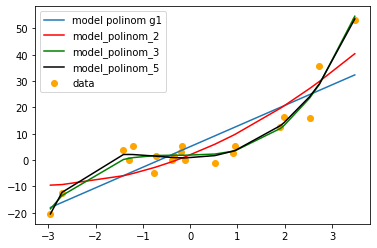

In [ ]:
plt.figure()
plt.scatter(dataset['x'], dataset['y'], label='data', c = 'orange')
plt.plot(dataset['x'], dataset['prediksi_model'], label = 'model polinom g1')
plt.plot(dataset['x'], dataset['prediksi_2'], label = 'model_polinom_2', c = 'red')
plt.plot(dataset['x'], dataset['prediksi_3'], label = 'model_polinom_3', c = 'green')
plt.plot(dataset['x'], dataset['prediksi_polinom_5'], label = 'model_polinom_5', c = 'black')
plt.legend()
plt.show()

In [ ]:
metrics.r2_score(dataset['prediksi_polinom_5'], dataset['y']) #INI YANG DIPILIH

0.9520373527672576

In [ ]:
metrics.r2_score(dataset['prediksi_2'], dataset['y'])

0.7589888972795049

In [ ]:
metrics.r2_score(dataset['prediksi_3'], dataset['y'])

0.9471225151347236

In [ ]:
sse = ((dataset['prediksi_polinom_5'] - dataset['y'])**2).sum()
sse

216.9233331569333

In [ ]:
# memprediksi 1 angka
x_prediksi = [[1.5], [2]] #kalo 1 angka list dibuat 1
x_prediksi_polinom = polinomial.fit_transform(x_prediksi)
print(x_prediksi_polinom)
y_prediksi = poly_model.predict(x_prediksi_polinom)
y_prediksi

[[ 1.       1.5      2.25     3.375    5.0625   7.59375]
 [ 1.       2.       4.       8.      16.      32.     ]]


array([ 8.08558972, 14.40983814])

# MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Intro to Python 7/Pertemuan 9-12/data_ecom.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
target = 'Reached.on.Time_Y.N'

In [ ]:
# distribusi target variable
data[target].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

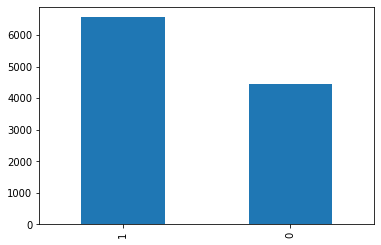

In [ ]:
data[target].value_counts().plot(kind='bar')

In [ ]:
data[target].value_counts() / len(data)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
data[target].sum()

6563

In [ ]:
data[target].count() - data[target].sum()

4436

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


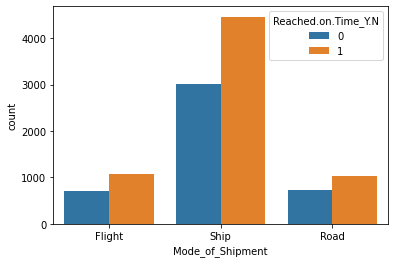

In [ ]:
sns.countplot('Mode_of_Shipment', data=data, hue = target)

In [ ]:
pivot_table = pd.pivot_table(data, columns = target, index = ['Mode_of_Shipment'], values='ID', aggfunc = 'count')
pivot_table ['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N,0,1,Rate
Mode_of_Shipment,,,
Flight,708,1069,0.601576
Road,725,1035,0.588068
Ship,3003,4459,0.597561


In [ ]:
pivot_table = pd.pivot_table(data, columns = target, index = ['Warehouse_block'], values='ID', aggfunc = 'count')
pivot_table ['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N,0,1,Rate
Warehouse_block,,,
A,758,1075,0.586470
B,729,1104,0.602291
C,739,1094,0.596836
D,738,1096,0.597601
F,1472,2194,0.598472


In [ ]:
pivot_table = pd.pivot_table(data, columns = target, index = ['Product_importance'], values='ID', aggfunc = 'count')
pivot_table ['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N,0,1,Rate
Product_importance,,,
high,332,616,0.649789
low,2157,3140,0.592788
medium,1947,2807,0.590450


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


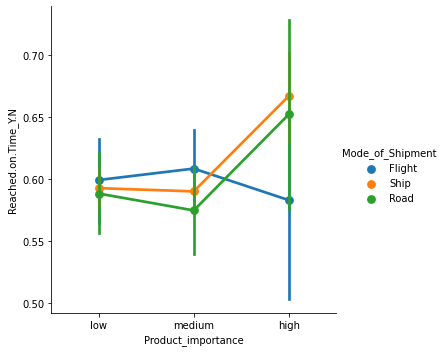

In [ ]:
sns.factorplot('Product_importance', target, hue = 'Mode_of_Shipment', data = data)
# y % selamat dari populasi di segment tsb, x =target
# semakin kecil data di tenah segmen tsb, semakin besar error barnya

In [ ]:
pivot_table = pd.pivot_table(data, columns = target, index = ['Product_importance', 'Mode_of_Shipment'], values='ID', aggfunc = 'count')
pivot_table ['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N                     0     1      Rate
Product_importance Mode_of_Shipment                      
high               Flight              68    95  0.582822
                   Road                55   103  0.651899
                   Ship               209   418  0.666667
low                Flight             336   502  0.599045
                   Road               353   504  0.588098
                   Ship              1468  2134  0.592449
medium             Flight             304   472  0.608247
                   Road               317   428  0.574497
                   Ship              1326  1907  0.589855

In [ ]:
data['group_Weight_in_gms'] = pd.qcut(data['Weight_in_gms'], q=5 )
display(data.head())

pivot_table = pd.pivot_table(data, columns = target, index = ['group_Weight_in_gms'], values='ID', aggfunc = 'count')
pivot_table['Total'] = pivot_table[1] + pivot_table[0]
pivot_table ['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]"
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]"
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]"
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]"
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]"


Reached.on.Time_Y.N,0,1,Total,Rate
group_Weight_in_gms,,,,
"(1000.999, 1677.6]",710,1490,2200,0.677273
"(1677.6, 3319.8]",336,1864,2200,0.847273
"(3319.8, 4512.0]",855,1346,2201,0.611540
"(4512.0, 5245.8]",1273,925,2198,0.420837
"(5245.8, 7846.0]",1262,938,2200,0.426364


In [ ]:
data['group_Cost_of_the_Product'] = pd.qcut(data['Cost_of_the_Product'], q=5 )
display(data.head())

pivot_table = pd.pivot_table(data, columns = target, index = ['group_Cost_of_the_Product'], values='ID', aggfunc = 'count')
pivot_table ['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_Weight_in_gms,group_Cost_of_the_Product
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]","(161.0, 196.0]"
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]","(196.0, 231.0]"
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]","(161.0, 196.0]"
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]","(161.0, 196.0]"
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]","(161.0, 196.0]"


Reached.on.Time_Y.N,0,1,Rate
group_Cost_of_the_Product,,,
"(95.999, 161.0]",797,1438,0.643400
"(161.0, 196.0]",819,1371,0.626027
"(196.0, 231.0]",898,1330,0.596948
"(231.0, 257.0]",966,1220,0.558097
"(257.0, 310.0]",956,1204,0.557407


## MANIPULASI DATA

In [ ]:
#label encoder, one hot encoder
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['Product_importance_coded'] = encoder.fit_transform(data['Product_importance'])
# label encoder dengan value yang bnyk akan memberikan sebuah asumsi bahwa
# A lebih rendah dibandingkan B, B lebih rendah dibandingkan C dst
# padahal belum tentu, bisa saja kemungkinan selamat A>C, kemunginan selamat B<C
pd.pivot_table(data,columns='Product_importance_coded', index = 'Product_importance', values = 'ID', aggfunc ='count')

Product_importance_coded,0,1,2
Product_importance,,,
high,948.0,NaN,NaN
low,NaN,5297.0,NaN
medium,NaN,NaN,4754.0


In [ ]:
data['Product_importance_coded_2'] = np.where(data['Product_importance'] == 'low', 0,
                                              np.where(data['Product_importance'] == 'medium', 1, 2))
pd.pivot_table(data, columns = 'Product_importance_coded_2', index = 'Product_importance', values='ID', aggfunc = 'count')

Product_importance_coded_2,0,1,2
Product_importance,,,
high,NaN,NaN,948.0
low,5297.0,NaN,NaN
medium,NaN,4754.0,NaN


In [ ]:
# one hot encoder manual
data['Mode_of_Shipment_is_flight'] = np.where(data['Mode_of_Shipment'] == 'flight', 1,0)
data['Mode_of_Shipment_is_road'] = np.where(data['Mode_of_Shipment'] == 'flight', 1,0)
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_Weight_in_gms,group_Cost_of_the_Product,Product_importance_coded,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]","(161.0, 196.0]",1,0,0,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]","(196.0, 231.0]",1,0,0,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]","(161.0, 196.0]",1,0,0,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]","(161.0, 196.0]",2,1,0,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]","(161.0, 196.0]",2,1,0,0


In [ ]:
#product importance
#low, medium, high -> string -> numeric
#0,1,2 -> label encoder -> mengubah string jadi numeric
#flight, road, ship

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error', sparse = False, drop ='first')
X_onehot = data[['Warehouse_block']]
X_array = enc.fit_transform(X_onehot)
X_out = pd.DataFrame(X_array, columns = enc.get_feature_names(['Warehouse_block']))
data_new = pd.concat([data, X_out], axis = 1)
data_new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,group_Weight_in_gms,group_Cost_of_the_Product,Product_importance_coded,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,1,D,Flight,4,2,177,3,low,F,44,...,"(1000.999, 1677.6]","(161.0, 196.0]",1,0,0,0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,low,M,59,...,"(1677.6, 3319.8]","(196.0, 231.0]",1,0,0,0,0.0,0.0,0.0,1.0
2,3,A,Flight,2,2,183,4,low,M,48,...,"(3319.8, 4512.0]","(161.0, 196.0]",1,0,0,0,0.0,0.0,0.0,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,...,"(1000.999, 1677.6]","(161.0, 196.0]",2,1,0,0,1.0,0.0,0.0,0.0
4,5,C,Flight,2,2,184,3,medium,F,46,...,"(1677.6, 3319.8]","(161.0, 196.0]",2,1,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,"(1000.999, 1677.6]","(231.0, 257.0]",2,1,0,0,0.0,0.0,0.0,0.0
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,"(1000.999, 1677.6]","(231.0, 257.0]",2,1,0,0,1.0,0.0,0.0,0.0
10996,10997,C,Ship,5,4,242,5,low,F,4,...,"(1000.999, 1677.6]","(231.0, 257.0]",1,0,0,0,0.0,1.0,0.0,0.0
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,"(1000.999, 1677.6]","(196.0, 231.0]",2,1,0,0,0.0,0.0,0.0,1.0


In [ ]:
#buat one hot encoder kolom kategori lainnya
# gender, product_importance

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error', sparse = False, drop ='first')
X_onehot = data[['Gender', "Product_importance"]]
X_array = enc.fit_transform(X_onehot)
X_out = pd.DataFrame(X_array, columns = enc.get_feature_names(['Gender', "Product_importance"]))
data_new_final = pd.concat([data_new, X_out], axis = 1)
data_new_final

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_M,Product_importance_low,Product_importance_medium
0,1,D,Flight,4,2,177,3,low,F,44,...,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,low,M,59,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,3,A,Flight,2,2,183,4,low,M,48,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,...,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,C,Flight,2,2,184,3,medium,F,46,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10996,10997,C,Ship,5,4,242,5,low,F,4,...,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


## MODELLING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data_new_final[target].value_counts()/ len(data_new_final)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
data_new_final.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'group_Weight_in_gms',
       'group_Cost_of_the_Product', 'Product_importance_coded',
       'Product_importance_coded_2', 'Mode_of_Shipment_is_flight',
       'Mode_of_Shipment_is_road', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Gender_M',
       'Product_importance_low', 'Product_importance_medium'],
      dtype='object')

In [ ]:
features = ['Weight_in_gms', 'Customer_rating', 'Product_importance_coded_2']
X = data_new_final[features]
y = data_new_final[target]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42, stratify =y) #42 itu konvensional
# test size = jumlah data yang akan kita jadika test (0.2 = 20%)
# random_state = ketika kita jalankan, kombinasi random tidak berubah
# stratify = menyeimbangkan jumah data berdasarkan y, target suvive atau tidak
print('Jumlah data train dan test, 80:20:', len(y_train), len(x_test))
print('train')
display(y_train.value_counts()/len(y_train))

print('test')
display(y_test.value_counts()/len(y_test))

Jumlah data train dan test, 80:20: 8799 2200
train


1    0.596659
0    0.403341
Name: Reached.on.Time_Y.N, dtype: float64

test


1    0.596818
0    0.403182
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# initiation the model
logit_model = LogisticRegression()
logit_model.fit(X=x_train, y=y_train) #fitting sudah selesai
print('intercept ', logit_model.intercept_)
print('coeff', logit_model.coef_)

intercept  [1.5621634]
coeff [[-0.00034996  0.01757447  0.13415709]]


In [ ]:
y_pred_test = logit_model.predict(x_test) # prediksi data test
y_pred_train = logit_model.predict(x_train) # prediksi data train

In [ ]:
test_pivot = pd.crosstab(y_pred_test, y_test) #index, columns
train_pivot = pd.crosstab(y_pred_train, y_train) #index, columns
display(train_pivot, test_pivot)
#objektif kita didini adalah meningkatkan score acuracy dari data setinggi mungkin

Reached.on.Time_Y.N,0,1
row_0,,
0,1494,1143
1,2055,4107


Reached.on.Time_Y.N,0,1
row_0,,
0,415,268
1,472,1045


In [ ]:
# baris = hasi prediksi, kolom = data sebenarnya
# menghitung seberapa tepat model kita untuk klasifikasikan menggunakan acuracy
# confusion matrix = crosstab/pivot table antara hasil prediksi dengan hasil asli

train_acc = (4107+1494)/len(y_train)
test_acc = (1045+415)/len(y_test)
print(train_acc, test_acc)

0.6365496079099898 0.6636363636363637


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_pred_test, y_test))

0.6365496079099898
0.6636363636363637


In [ ]:
# 1. tugas
# 5 features
# 10 features
# liat accuracy

In [ ]:
data_new_final

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_M,Product_importance_low,Product_importance_medium
0,1,D,Flight,4,2,177,3,low,F,44,...,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,low,M,59,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,3,A,Flight,2,2,183,4,low,M,48,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,...,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,C,Flight,2,2,184,3,medium,F,46,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10996,10997,C,Ship,5,4,242,5,low,F,4,...,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


## 5 variable

In [ ]:
features = ['Weight_in_gms', 'Customer_rating', 'Product_importance_coded_2', 'Customer_care_calls', 'Cost_of_the_Product']
X = data_new_final[features]
y = data_new_final[target]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42, stratify =y) #42 itu konvensional
# test size = jumlah data yang akan kita jadika test (0.2 = 20%)
# random_state = ketika kita jalankan, kombinasi random tidak berubah
# stratify = menyeimbangkan jumah data berdasarkan y, target suvive atau tidak
print('Jumlah data train dan test, 80:20:', len(y_train), len(x_test))
print('train')
display(y_train.value_counts()/len(y_train))

print('test')
display(y_test.value_counts()/len(y_test))

Jumlah data train dan test, 80:20: 8799 2200
train


1    0.596659
0    0.403341
Name: Reached.on.Time_Y.N, dtype: float64

test


1    0.596818
0    0.403182
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# initiation the model
logit_model = LogisticRegression()
logit_model.fit(X=x_train, y=y_train) #fitting sudah selesai
print('intercept ', logit_model.intercept_)
print('coeff', logit_model.coef_)

intercept  [3.88366608]
coeff [[-0.00044493 -0.01491459  0.17996273 -0.24591602 -0.0041949 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred_test = logit_model.predict(x_test) # prediksi data test
y_pred_train = logit_model.predict(x_train) # prediksi data train

In [ ]:
test_pivot = pd.crosstab(y_pred_test, y_test) #index, columns
train_pivot = pd.crosstab(y_pred_train, y_train) #index, columns
display(train_pivot, test_pivot)
#objektif kita didini adalah meningkatkan score acuracy dari data setinggi mungkin

Reached.on.Time_Y.N,0,1
row_0,,
0,1477,1189
1,2072,4061


Reached.on.Time_Y.N,0,1
row_0,,
0,391,291
1,496,1022


In [ ]:
# baris = hasi prediksi, kolom = data sebenarnya
# menghitung seberapa tepat model kita untuk klasifikasikan menggunakan acuracy
# confusion matrix = crosstab/pivot table antara hasil prediksi dengan hasil asli

train_acc = (4061+1494)/len(y_train)
test_acc = (1045+415)/len(y_test)
print(train_acc, test_acc)

0.631321741106944 0.6636363636363637


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_pred_test, y_test))

0.6293897033753836
0.6422727272727272


In [ ]:
X.corr()

,Weight_in_gms,Customer_rating,Product_importance_coded_2,Customer_care_calls,Cost_of_the_Product
Weight_in_gms,1.000000,-0.001897,0.093211,-0.276615,-0.132604
Customer_rating,-0.001897,1.000000,0.003999,0.012209,0.009270
Product_importance_coded_2,0.093211,0.003999,1.000000,-0.058134,-0.046789
Customer_care_calls,-0.276615,0.012209,-0.058134,1.000000,0.323182
Cost_of_the_Product,-0.132604,0.009270,-0.046789,0.323182,1.000000


# Logistic Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#features = ['Discount-offered', 'Product_importance_low', 'Gender_M']

features = ['Weight_in_gms', 'Cost_of_the_Product',
           'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Gender_M', 'Product_importance_medium']
# fitur yang dihilangkan :
       #'Product_importance_coded'
       # 'Product_importance_coded_2'
       # 'Product_importance_low'

X = data_new_final[features] #ambil data tang sesuai sama fitur
X_vif = add_constant(X) #constant -> nambahin 1 dalam data frame
# y = a0x0 +a1x1 + a2x2 +
# constant = x0, x0 = [1, ..., ...] = a0 *x0 = a0

display(X_vif.head())
for i in range(len(X_vif.columns)):
  print(variance_inflation_factor(X_vif.values,i))

pd.Series([variance_inflation_factor(X_vif.values,i)
  for i in range(X_vif.shape[1])],
  index = X_vif.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Weight_in_gms,Cost_of_the_Product,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_M,Product_importance_medium
0,1.0,1233,177,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,3088,216,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,3374,183,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1177,176,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,2484,184,0.0,1.0,0.0,0.0,0.0,1.0


34.214500090248805
1.0196237011502518
1.019161955100238
1.668422026000714
1.6673002373920192
1.6673892491513675
2.000475345916484
1.000594269507211
1.002480277869459


const                        34.214500
Weight_in_gms                 1.019624
Cost_of_the_Product           1.019162
Warehouse_block_B             1.668422
Warehouse_block_C             1.667300
Warehouse_block_D             1.667389
Warehouse_block_F             2.000475
Gender_M                      1.000594
Product_importance_medium     1.002480
dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features = ['Weight_in_gms', 'Cost_of_the_Product',
           'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Gender_M', 'Product_importance_medium']
X = data_new_final[features]
y = data_new_final[target]

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42, stratify =y) #42 itu konvensional
# test size = jumlah data yang akan kita jadika test (0.2 = 20%)
# random_state = ketika kita jalankan, kombinasi random tidak berubah
# initiation the model
logit_model = LogisticRegression()
logit_model.fit(X=x_train, y=y_train) #fitting sudah selesai
print('intercept ', logit_model.intercept_)
print('coeff', logit_model.coef_)

y_pred_test = logit_model.predict(x_test) # prediksi data test
y_pred_train = logit_model.predict(x_train) # prediksi data train

from sklearn.metrics import accuracy_score
print('Accuracy Score (Train)',  accuracy_score(y_pred_train, y_train))
print('Accuracy Score (Test)',  accuracy_score(y_pred_test, y_test))

intercept  [2.67955042e-05]
coeff [[-1.84517923e-04  4.66901742e-03  4.49280194e-06  3.47429855e-06
   5.33642785e-06  9.14275954e-06  1.37141802e-05  9.34156152e-06]]
Accuracy Score (Train) 0.6381406978065689
Accuracy Score (Test) 0.6377272727272727


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
features = ['Weight_in_gms', 'Cost_of_the_Product', 'Product_importance_coded']

X = data_new_final[features] #features
y = data_new_final[target] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
#semakin besar max depthnya semakin over fit -> score train dan testnya berbeda
#train mendekati 1, test rendah
#semakin kecil semakin underfit

In [ ]:
model.fit(X_train, y_train)
y_pred_t_test = model.predict(X_test) # prediksi data test
y_pred_t_train = model.predict(X_train) # prediksi data train

In [ ]:
accuracy_score(y_pred_t_train, y_train)

0.6880327309921582

In [ ]:
accuracy_score(y_pred_t_test, y_test)

0.6786363636363636

In [ ]:
for i in range (1, 20, 1):
  model = DecisionTreeClassifier(max_depth = i, random_state = 42)
  model.fit(X_train, y_train)
  y_pred_t_test = model.predict(X_test) # prediksi data test
  y_pred_t_train = model.predict(X_train) # prediksi data train
  score_train = accuracy_score(y_pred_t_train, y_train)
  score_test = accuracy_score(y_pred_t_test, y_test)
  print('Max_depth', i, 'Train : ', score_train, 'Test : ', score_test)

Max_depth 1 Train :  0.669962495738152 Test :  0.6777272727272727
Max_depth 2 Train :  0.6709853392430958 Test :  0.6786363636363636
Max_depth 3 Train :  0.6854187975906353 Test :  0.6763636363636364
Max_depth 4 Train :  0.6856460961472894 Test :  0.6818181818181818
Max_depth 5 Train :  0.6880327309921582 Test :  0.6786363636363636
Max_depth 6 Train :  0.6928060006818957 Test :  0.6772727272727272
Max_depth 7 Train :  0.6967837254233435 Test :  0.6840909090909091
Max_depth 8 Train :  0.705648369132856 Test :  0.6881818181818182
Max_depth 9 Train :  0.7104216388225935 Test :  0.6877272727272727
Max_depth 10 Train :  0.720650073872031 Test :  0.6777272727272727
Max_depth 11 Train :  0.7319013524264121 Test :  0.6809090909090909
Max_depth 12 Train :  0.7423570860325037 Test :  0.6854545454545454
Max_depth 13 Train :  0.753835663143539 Test :  0.6722727272727272
Max_depth 14 Train :  0.7663370837595181 Test :  0.6745454545454546
Max_depth 15 Train :  0.7816797363336743 Test :  0.6709090909

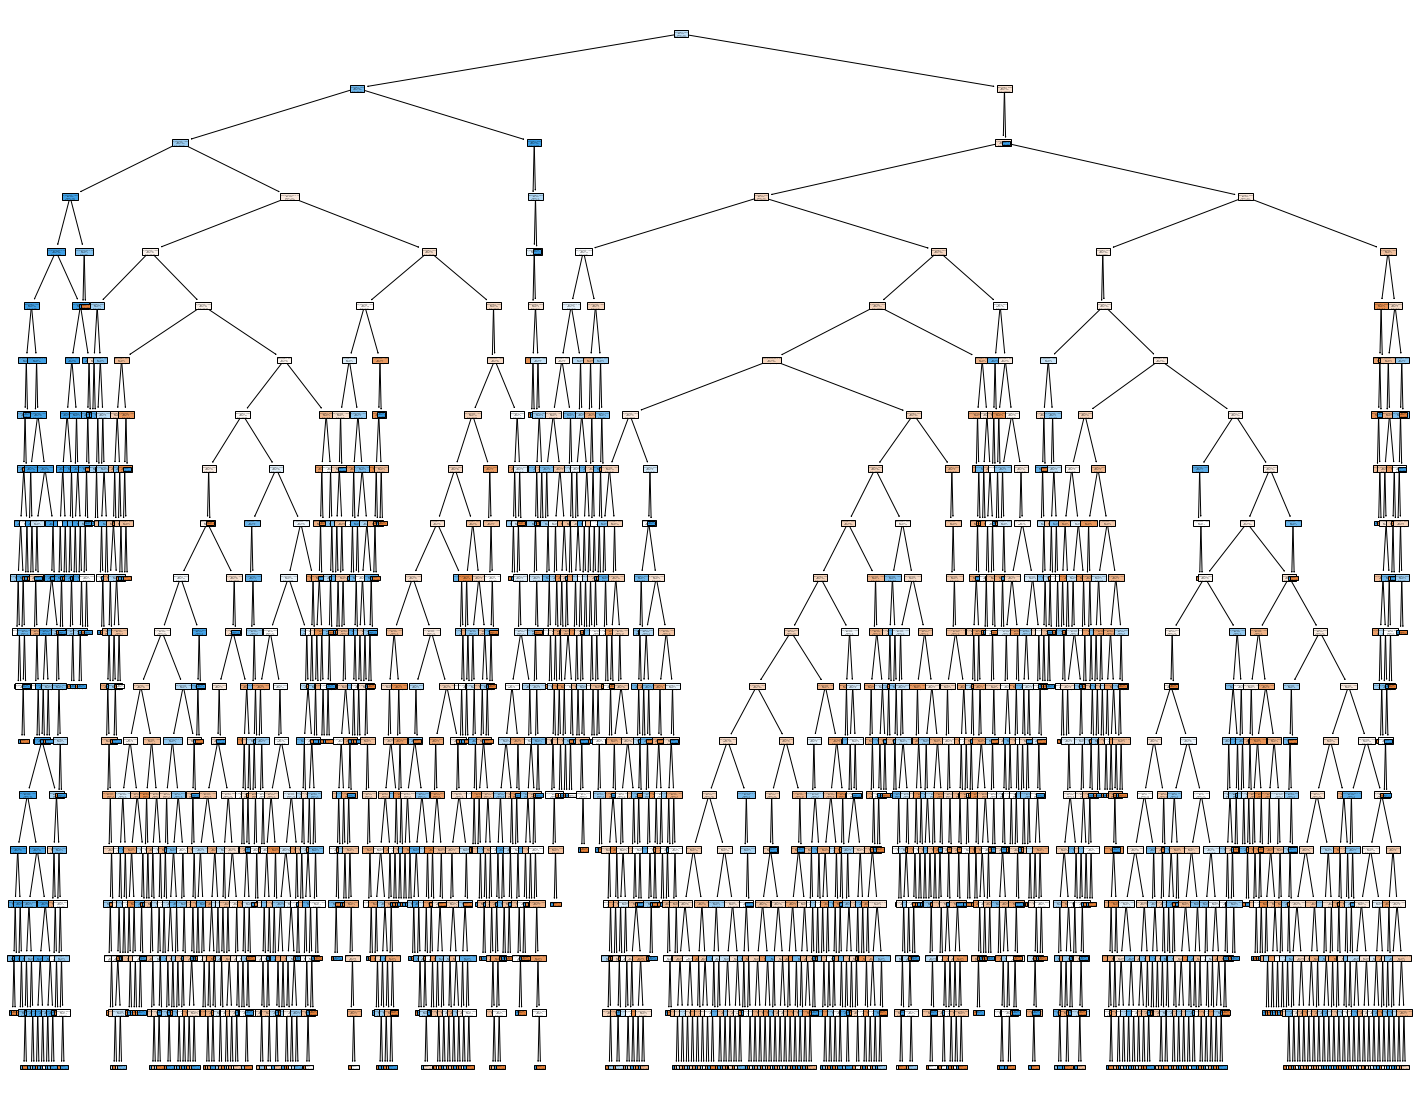

In [ ]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(model, feature_names = features, filled = True)

## predict

In [ ]:
model.predict([[5000, 0.2, 2]]) #memprediksi data baru
#jumlah datanya harus sesuai sama featuresnya

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
data_baru = pd.DataFrame([[5000, 0.2, 2], [1000, 0.5, 2]], columns = features)
data_baru['prediksi'] = model.predict(data_baru)
data_baru

,Weight_in_gms,Cost_of_the_Product,Product_importance_coded,prediksi
0,5000,0.2,2,1
1,1000,0.5,2,1


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20, metric = 'euclidean')
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [ ]:
features = ['Weight_in_gms', 'Cost_of_the_Product', 'Product_importance_coded']

X = data_new_final[features] #features
y = data_new_final[target] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print('Jumlah data train dan test, 80:20 : ', len(X_train), len(X_test))

knn.fit(X = X_train, y = y_train) #fitting sudah selesai
y_pred_test = knn.predict(X_test) #prediksi data test
y_pred_train = knn.predict(X_train) #prediksi data train

print('Accuracy Train', knn.score(X_train, y_train)) #lgsg accuracy
print('Accuracy test', knn.score(X_test, y_test))

test_pivot = pd.crosstab(y_pred_test, y_test)
test_pivot = pd.crosstab(y_pred_train, y_train)
display(train_pivot, test_pivot)

Jumlah data train dan test, 80:20 :  8799 2200
Accuracy Train 0.7100806909876123
Accuracy test 0.6736363636363636


Reached.on.Time_Y.N,0,1
row_0,,
0,1477,1189
1,2072,4061


Reached.on.Time_Y.N,0,1
row_0,,
0,2925,1927
1,624,3323


In [ ]:
for i in range (5, 30, 1):
  knn_looping = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  knn_looping.fit(X_train, y_train)
  y_pred_t_test = knn_looping.predict(X_test) # prediksi data test
  y_pred_t_train = knn_looping.predict(X_train) # prediksi data train
  score_train = accuracy_score(y_pred_t_train, y_train)
  score_test = accuracy_score(y_pred_t_test, y_test)
  print('Max_depth', i, 'Train : ', score_train, 'Test : ', score_test)

Max_depth 5 Train :  0.7871349016933743 Test :  0.6454545454545455
Max_depth 6 Train :  0.7613365155131265 Test :  0.6463636363636364
Max_depth 7 Train :  0.764745993862939 Test :  0.6354545454545455
Max_depth 8 Train :  0.7453119672690078 Test :  0.644090909090909
Max_depth 9 Train :  0.7467894078872599 Test :  0.6481818181818182
Max_depth 10 Train :  0.7379247641777474 Test :  0.6554545454545454
Max_depth 11 Train :  0.73860665984771 Test :  0.6568181818181819
Max_depth 12 Train :  0.73315149448801 Test :  0.6609090909090909
Max_depth 13 Train :  0.7306512103648142 Test :  0.66
Max_depth 14 Train :  0.7213319695419934 Test :  0.6590909090909091
Max_depth 15 Train :  0.7242868507784975 Test :  0.6659090909090909
Max_depth 16 Train :  0.7187180361404705 Test :  0.6745454545454546
Max_depth 17 Train :  0.7205364245937038 Test :  0.6713636363636364
Max_depth 18 Train :  0.7159904534606205 Test :  0.68
Max_depth 19 Train :  0.7123536765541539 Test :  0.6704545454545454
Max_depth 20 Train 

# UNSUPERVISED LEARNING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_mall = pd.read_csv('/content/drive/MyDrive/Intro to Python 7/project data/data_mall_customer.csv')
data_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


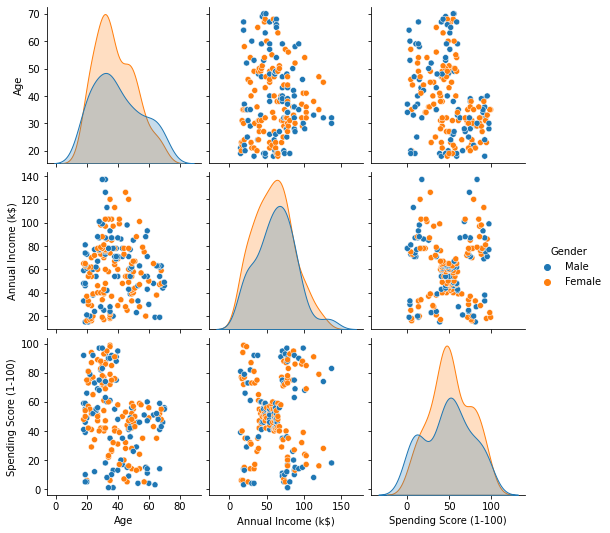

In [ ]:
sns.pairplot(data_mall[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']], hue = 'Gender' )

In [ ]:
X = data_mall[['Annual Income (k$)', 'Spending Score (1-100)']]
X.columns = ['Income', 'Score']

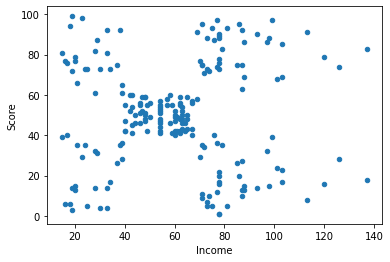

In [ ]:
plt.figure()
plt.scatter(X['Income'], X['Score'], s=20)
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# initialize model
kmeans = KMeans(n_clusters=5)

In [ ]:
# define X sm fitting model
X_train = X[['Income', 'Score']]
kmeans.fit(X_train)

KMeans(n_clusters=5)

In [ ]:
# predict
X['y_cluster'] = kmeans.predict(X_train)
print(np.unique(X['y_cluster']))

[0 1 2 3 4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


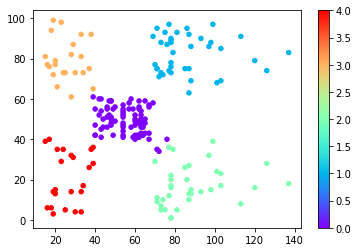

In [ ]:
# plotting scatter plot hasil prediksi
plt.scatter(X['Income'],X['Score'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.show()

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


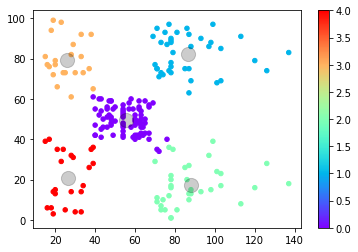

In [ ]:
# mencari pusat cluster kmeans
centers = kmeans.cluster_centers_
print(centers)

# plot titik tengah cluster (berdasarkan lokasi 2 d)
plt.scatter(X['Income'],X['Score'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.2)
plt.show()

In [ ]:
X.groupby('y_cluster')[['Income', 'Score', 'y_cluster']].agg({'Income':'mean', 'Score':'mean', 'y_cluster':'count'})

,Income,Score,y_cluster
y_cluster,,,
0,55.296296,49.518519,81
1,86.538462,82.128205,39
2,88.200000,17.114286,35
3,25.727273,79.363636,22
4,26.304348,20.913043,23


In [ ]:
# prediksi hasil
income_A = 60
score_A = 20
kmeans.predict([[income_A, score_A]]) #hasil segmen 2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

## Latihan unsupervised learning

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Intro to Python 7/Pertemuan 9-12/unsupervised_latihan.csv')
data.head()

,rerata_pembelian_1_tahun,rerata_total_harga_pembelian_1_tahun
0,17.301094,79.585850
1,-11.367002,15.056503
2,95.097424,51.782866
3,33.532930,80.436281
4,27.614003,11.518698


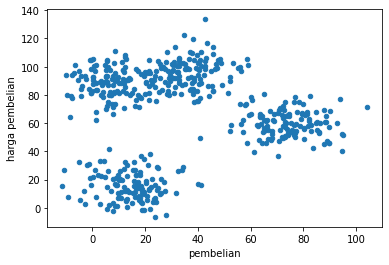

In [ ]:
X = data[['rerata_pembelian_1_tahun', 'rerata_total_harga_pembelian_1_tahun']]
X.columns = ['rerata_pembelian', 'harga_pembelian']
plt.figure()
plt.scatter(X['rerata_pembelian'], X['harga_pembelian'], s=20)
plt.xlabel('pembelian')
plt.ylabel('harga pembelian')
plt.show()

[0 1 2 3]


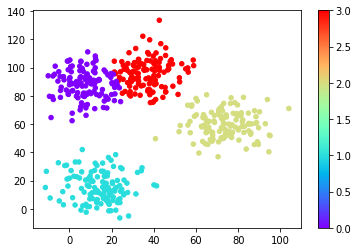

In [ ]:
from sklearn.cluster import KMeans
# initialize model
kmeans = KMeans(n_clusters=4)

# define X sm fitting model
X_train = X[['rerata_pembelian', 'harga_pembelian']]
kmeans.fit(X_train)

# predict
X['y_cluster'] = kmeans.predict(X_train)
print(np.unique(X['y_cluster']))

# plotting scatter plot hasil prediksi
plt.scatter(X['rerata_pembelian'],X['harga_pembelian'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.show()

[[ 7.25367554 88.13253722]
 [14.38848695 15.35597258]
 [73.91235737 59.50783516]
 [36.93192479 95.93850223]]


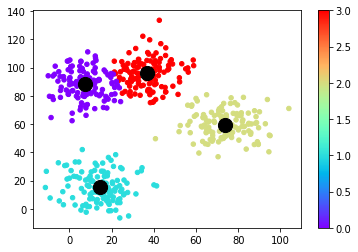

In [ ]:
# mencari pusat cluster kmeans
centers = kmeans.cluster_centers_
print(centers)

# plot titik tengah cluster (berdasarkan lokasi 2 d)
plt.scatter(X['rerata_pembelian'],X['harga_pembelian'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=1)
plt.show()

In [ ]:
X.groupby('y_cluster')[['rerata_pembelian', 'harga_pembelian', 'y_cluster']].agg({'rerata_pembelian':'mean', 'harga_pembelian':'mean', 'y_cluster':'count'})

,rerata_pembelian,harga_pembelian,y_cluster
y_cluster,,,
0,7.253676,88.132537,127
1,14.388487,15.355973,125
2,73.912357,59.507835,126
3,36.931925,95.938502,122


In [ ]:
# prediksi hasil
income_A = 30
score_A = 80
kmeans.predict([[income_A, score_A]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=int32)